## ThaiPass Kepler Notebook
##### 8$^{th}$ Oct 2018

### Task 1 - Mini-project

For this mini project, we will take a well known equation and turn it into a function so that we can compute the period of orbit of any planet around any star.

Kepler's Third Law of Planetarty Motion alows us to calculate the motion of planets in orbit around a star.

Your task is to take the following equation:

$T^2 = \frac{4\pi^2 a^3} {GM}$

Where T is the period of rotation, G is the gravitational constant, M is the mass of the central object and a is the length of the semi-major axis of the elipse.

Design a function that, given a and M, gives the period of rotation of a planet.

Make sure to include proper documentation in the for of comments to ensure that the next time you look at your code you can quickly recognise what it does.

In [19]:
# Import tho modules you will need:
import numpy as np
import matplotlib.pyplot as plt

def T_period(a,M): # Here our function has 2 input variables: a and M
    G = 6.674E-11 # Universal Gravitational Constant
    T_sqr = ((4*(np.pi**2))*(a**3))/(G*M) # Equation from kepler's third law
    T = (T_sqr**0.5)/(365.25*24*60*60) # Change time period into years and square rooting it
    return(T)
# Check for the sun and earth:
print('Orbital period for Earth: '+str(kepler(1.496E11,1.989E30)))

Orbital period for Earth: 0.9994074308818596


Taking this function, determine the orbital period or a planet at distances between 1 AU and 100 AU for 10 masses of stars between 0.1 and 10 times the mass of the sun (**arange** or **linspace** will help with this)

Ensure that your plots are have both axis labeled.

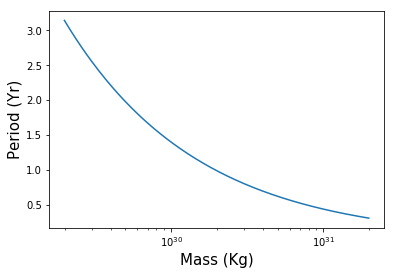

In [25]:
# Now inplement this for a range of a and M

AU = 1.49E11 # Define what is 1AU, in meters
dist_array = np.linspace(AU,AU**2,1000) #Create an array of semi-major values

M_sun = 1.989E30 # Define the mass of the sun, in Kg
Mass_array = np.linspace(M_sun*0.1,M_sun*10,1000) # Create an array of masses

# Create arrays of T for plotting:
T_mass = []
for mass in Mass_array: # here we will create alist of time periods with a constant a
    a = AU # Define a as one AU
    T_mass.append(T_period(a,mass)) # Calculate T and add it to the list
   
    
plt.semilogx(Mass_array,T_mass) # Plot the data generated above, with the x-axis on a log scale
plt.xlabel('Mass (Kg)',fontsize=15)
plt.ylabel('Period (Yr)',fontsize=15)
plt.show()

Finally, take each of these series of orbital periods for each mass of star, and make a plot of the dependance of T on distance from the star.

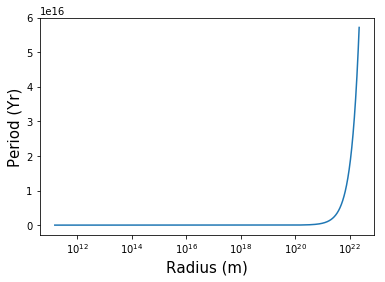

In [26]:
T_dist = []
for dist in dist_array: # Here we will create a list of time periods with a constant mass
    M = M_sun # Defone mass as one solar mass
    T_dist.append(T_period(dist,M))   # Calculate the time period and add them to the list
    
plt.semilogx(dist_array,T_dist) # Plot the data generated above, with the x-axis on a log scale
plt.xlabel('Radius (m)',fontsize=15)
plt.ylabel('Period (Yr)',fontsize=15)
plt.show()

### Task 2 - Orbital Velocity

Using the following equation, calculated by equating Newton's gravitational equation to the centripetal force equation, we can calculate the velocity in orbit for a given mass and radius.

$\frac{GM}r = \nu^{2}$

Your first task is to create a function that given M and r, will produce the orbital velocity.

In [13]:
def orb_vel(M,r):
    G = 6e-11 # Universal Gravitational Constant
    v = np.sqrt((G*M)/r) # Calculate v based on equation above
    return(v)

Your next task is to examine the effect of stellar masses on orbital velocities.

Produce a plot that shows the orbital velocities at 1 AU, for masses between 0.1 to 10 solar masses.

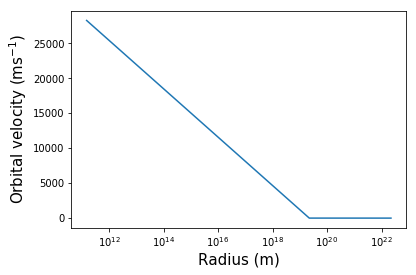

In [28]:
# We will use the arrays defined earlier on in this notebook, dist_array and mass_array

v_dist=[]
for i in dist_array: # Here we will calculate the velocities with mass set to a constant
    M = M_sun # We will fix the mass at the mass of the sun
    v_dist.append(orb_vel(M,i))
plt.semilogx(dist_array,v_dist) # Plot the data generated above, with the x-axis on a log scale
plt.xlabel('Radius (m)',fontsize=15)
plt.ylabel('Orbital velocity (ms$^{-1}$)',fontsize=15)
plt.show()

Your next task is to examine the effect of orbital radius on orbital velocities.

Produce a plot that shows the orbital velocities for a planet at distances between 0.1AU and 100AU, orbiting a star of the same mass as the sun. 

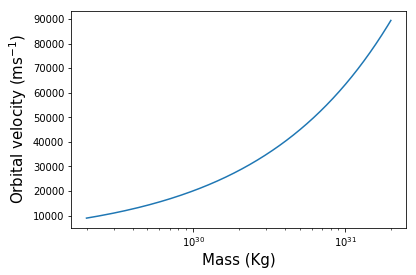

In [29]:
v_mass=[]
for i in Mass_array: # Here we will calculate the velocities with r set to a constant
    r = AU # We will fix the mass at one astronomical unit
    v_mass.append(orb_vel(i,r))
plt.semilogx(Mass_array,v_mass) # Plot the data generated above, with the x-axis on a log scale
plt.xlabel('Mass (Kg)',fontsize=15)
plt.ylabel('Orbital velocity (ms$^{-1}$)',fontsize=15)
plt.show()

### Task 3 - Elliptical orbits

Keplar's First Law states that all planets move around the sun in elliptical orbits, having the sun (or other star) as one of the foci.

As an orbit becomes more stretched out it becomes more *eccentric*. This is defined as the fraction of the ellipse which separates the focus from the center, and is denoted by an $e$ in the following equations.


![Keplar Laws Orbital Diagram](http://hyperphysics.phy-astr.gsu.edu/hbase/imgmec/kep.gif "Keplar Laws Orbital Diagram")

Diagram taken from: http://hyperphysics.phy-astr.gsu.edu/hbase/kepler.html#c2

The diagram above shows the geometry of an orbit. The key points to consider are the perihelion radius ($R_{p}$), aphelion radius ($R_{a}$), semi-major axis ($a$) and eccentricity ($e$).

The perihelion is the point at which the orbit brings the object closest to the sun. 
The aphelion is the point at which the orbit takes the object furthest from the sun. 
The semi-major axis is the radius of the elipse that is the longest.

Your first task is to combine the above equations and the equation you created in task 1, allowing you to calculate the time period of an orbit with a specific perhelion/aphelion radius, eccentricity and stellar mass.

In [30]:
def T_period_Ra(Ra,e,M):
    G = 6.674E-11 # Universal Gravitational Constant
    a = (Ra/(1+e)) # Calculate the semi major axis based on aphelion and eccentricity
    T_sqr = ((4*(np.pi**2))*(a**3))/(G*M) # Equation from kepler's third law
    T = (T_sqr**0.5)/(365.25*24*60*60) # Change time period into years and square rooting it
    return(T)

def T_period_Rp(Rp,e,M):
    G = 6.674E-11 # Universal Gravitational Constant
    a = (Rp/(1-e)) # Calculate the semi major axis based on aphelion and eccentricity
    T_sqr = ((4*(np.pi**2))*(a**3))/(G*M) # Equation from kepler's third law
    T = (T_sqr**0.5)/(365.25*24*60*60) # Change time period into years and square rooting it
    return(T)

Using the function you created above, we will examine the effect of eccentricity on orbital period for a star the same mass as the sun (1 solar mass), at a perhelion radius of 1 AU.

We will examine what the orbital period of the earth would be if it had the eccentricities of the other planets in the solar system, using the following table:

|Planet|$e$|
|:---:|:---:|
|Mercury| .206|
|Venus| .0068|
|Earth| .0167|
|Mars| .0934|
|Jupiter| .0485|
|Saturn|.0556|
|Uranus| .0472|
|Neptune|.0086|
|Pluto| .25|

Plot these as planets on the x-axis and orbital period on the y-axis

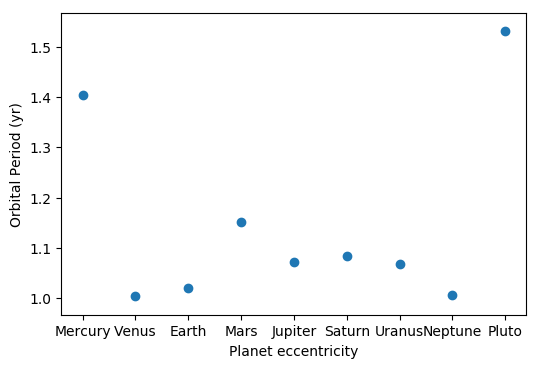

In [74]:
# Cjange the above table into a list
e_list =  [.206,.0068,.0167,.0934, .0485,.0556, .0472,.0086,.25]
planets = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune','Pluto']

T_ecc = []
for i in e_list:
    perihelion = AU # Set perihelion to 1 AU
    mass = M_sun    # Set mass to 1 solar mass
    T_ecc.append(T_period_Rp(perihelion,i,mass))

plt.figure(dpi=100) # Improve the resolution of the plot
plt.scatter(planets,T_ecc) # Plot the data with the x axis as the planet names
plt.xlabel('Planet eccentricity')
plt.ylabel('Orbital Period (yr)')
plt.show()

### Task 4 - Escape velocity

By equating kinetic energy and gravitational energy we can calculate the velocity at which the object will escape the gravitational pull of the object it is orbiting. This is the escape velocity.

$\frac{1}2 mv^{2} = \frac{GMm}{r}$

$v_{escape} \geq \sqrt{\frac{2GM}r}$



First, define a function which will calculate the escape velocity of an object, given its radius and the mass of the central object.

In [37]:
def escape_velocity(M,r):
    G = 6.674E-11 # Universal Gravitational Constant
    v = np.sqrt((2*G*M)/r) # Based on equation above, calculate the escape velocity
    return(v)

Next define a function which will compare the orbital velocities and escape velocities of an object. It should print a string to say whether the object will continue to orbit, or to escape.

In [78]:
def escape_vel_checker(v,M,r,mute = False): # Within this function we include a predefined mute parameter
    if v >= escape_velocity(M,r):           # this allows us to stop the print statements for large inputs
        if not mute:
            print('Escape velocity reached')
        test = True
    else:
        if not mute:
            print('Orbit will continue')
        test = False
    return(test) # Here we output the result of the escae velocity test, for finding the minimum escape velocity

v_list = np.arange(1e3,5e5,1) # Define a lsit of the velocities, between 1,000 to 500,000 m/s, with steps of 1
esc_v_check_list = []
for i in v_list:
    M = M_sun   # Set the mass to solar mass
    radius = AU # set radius to 1 AU
    esc_v_check_list.append(escape_vel_checker(i,M,radius,mute=True)) 
    
counter = 0 # We use a counter to help with outputting the correct velocity
for i in esc_v_check_list: # Here we loop through the tests to find the minimum escape velocity
    if i:                  # This calculation can be done easily by hand, but this is an example of a 
        print('escape velocity reached at: '+str(v_list[counter])+' m/s') #           True/False test.
        break # The break statement stops the loop early
    counter += 1

499000
escape velocity reached at: 42212.0 m/s
